# 🚀 Space Exploration (Explored)

##  ⏬ Importing libraries

In [34]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📚 Reading the data

In [35]:
# read data
raw_data = pd.read_csv("../data/Space_Corrected.csv", thousands=',')
raw_data.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


## 🔀 Organizing the data

In [36]:
# examine the form of the data before starting to work it
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4324 non-null   int64  
 1   Unnamed: 0.1    4324 non-null   int64  
 2   Company Name    4324 non-null   object 
 3   Location        4324 non-null   object 
 4   Datum           4324 non-null   object 
 5   Detail          4324 non-null   object 
 6   Status Rocket   4324 non-null   object 
 7    Rocket         964 non-null    float64
 8   Status Mission  4324 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 304.2+ KB


In [37]:
# simplify 'raw_data' and create an easier to work with 'missions' dataframe (1)
missions = raw_data.copy()
missions = missions.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
missions.rename(columns = {' Rocket':'Cost', 'Datum':'Date', 'Company Name':'Organisation'}, inplace = True)
missions

,Organisation,Location,Date,Detail,Status Rocket,Cost,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [38]:
# simplify 'raw_data' and create an easier to work with 'missions' dataframe (2)
missions['Date'] = pd.to_datetime(missions['Date'])
missions['Year'] = missions['Date'].apply(lambda datetime: datetime.year)
missions['Launch Location'] = missions['Location'].apply(lambda location: location.split(", ")[-1])
missions = missions.drop(columns=['Location', 'Date'])
missions = missions[missions['Year'] != 2020] # remove data from 2020, as it is not yet complete
missions

,Organisation,Detail,Status Rocket,Cost,Status Mission,Year,Launch Location
63,CASC,Long March 5 | Shijian-20,StatusActive,NaN,Success,2019,China
64,VKS RF,"Rokot/Briz KM | Gonets-M ???24, 25, 26 [block-...",StatusRetired,41.80,Success,2019,Russia
65,Roscosmos,Proton-M/DM-3 | Elektro-L n†­3,StatusActive,65.00,Success,2019,Kazakhstan
66,ULA,Atlas V N22 | Starliner OFT,StatusActive,NaN,Success,2019,USA
67,CASC,"Long March 4B | CBERS-4A, ETRSS-1 & Others",StatusActive,64.68,Success,2019,China
...,...,...,...,...,...,...,...
4319,US Navy,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958,USA
4320,AMBA,Juno I | Explorer 1,StatusRetired,NaN,Success,1958,USA
4321,US Navy,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957,USA
4322,RVSN USSR,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957,Kazakhstan


## 📊 Visualizing the data (with seaborn and matplotlib)

### Getting started

Before we get started we'll define the style of our visualisations and create a colour palette...

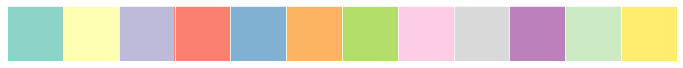

In [39]:
# useful resource re colour and data visualisation: https://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/
# src for color_brewer palette: https://colorbrewer2.org/#type=qualitative&scheme=Set3&n=12
sns.set_style("darkgrid")
color_brewer = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
sns.set_palette(color_brewer)
sns.palplot(sns.color_palette())

### Year vs # Missions

Visualizing the number of missions that occurred from 1957 up to 2020.

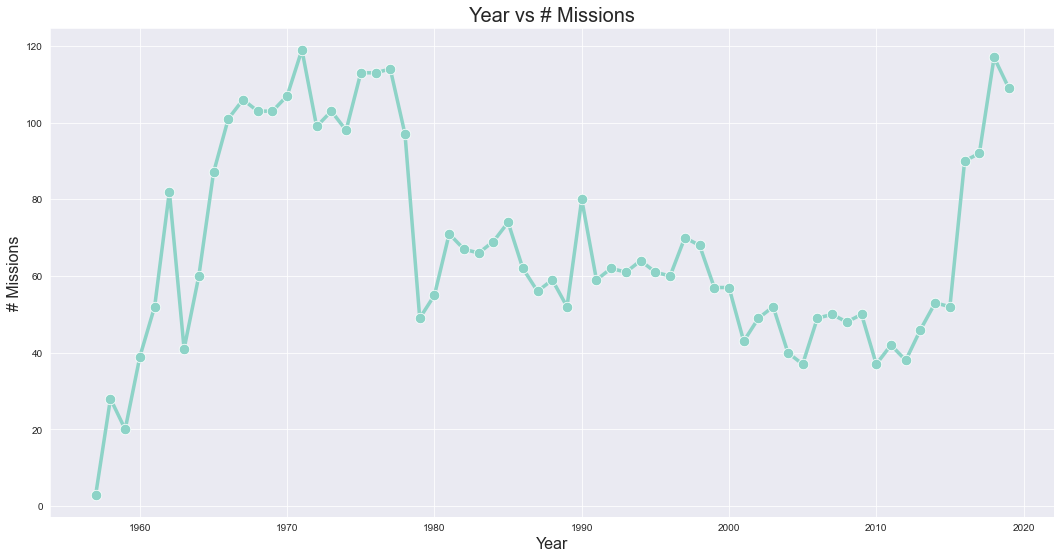

In [40]:
# set the plot size
fig = plt.figure(figsize=(18,9))

# define the data to be plotted
yearly_missions = missions["Year"].value_counts().to_frame()
yearly_missions = pd.DataFrame({"Year": yearly_missions.index, "Missions": yearly_missions.Year})
yearly_missions = yearly_missions.sort_values(by='Year')

# plot the data
ax = sns.lineplot(x="Year", y="Missions", data=yearly_missions, marker='o', linewidth=3.5, markersize=10.5)

# organize the axis
ax.axes.set_title("Year vs # Missions",fontsize=20)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("# Missions", fontsize=16)

# show the plot
plt.show()

# save the fig
fig.savefig('../img/yearvsmissions.png')

### Organisation vs # Missions

Visualising the average number of missions conducted per year for the top 5 most active organisations. From 1965 - 1978 and from 2016 - 2019. 

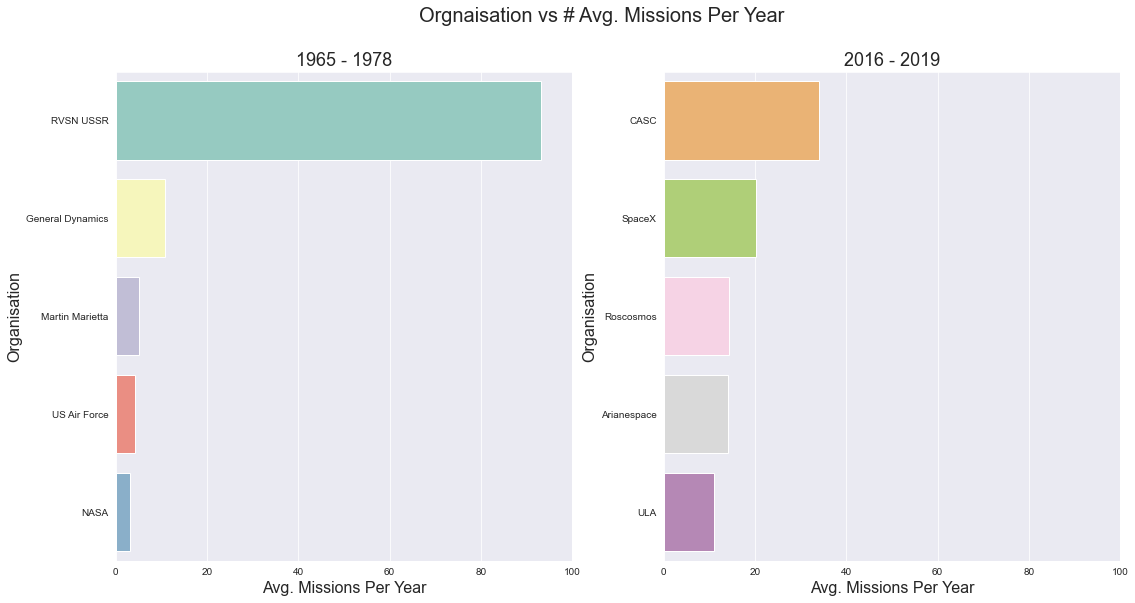

In [41]:
# split the data into two dataframes over the time periods we're interested in
from65 = missions[missions["Year"] >= 1965]
from65to78 = from65[from65["Year"] <= 1978]
from16to19 = missions[missions["Year"] >= 2016] # we've already cut data from 2020

# scale, sort, and show only the top 5
avgPerYear65to78 = from65to78["Organisation"].value_counts().mul(1 / 12).sort_values().nlargest(5).to_frame()
avgPerYear16to19 = from16to19["Organisation"].value_counts().mul(1 / 3).sort_values().nlargest(5).to_frame()

# recreate frames with better column names (this will make plotting easier)
avgPerYear65to78 = pd.DataFrame({"Org": avgPerYear65to78.index, "Avg": avgPerYear65to78.Organisation})
avgPerYear16to19 = pd.DataFrame({"Org": avgPerYear16to19.index, "Avg": avgPerYear16to19.Organisation})

# configure multiple plots on the same figure (and its size), with a shared title
figure, axs = plt.subplots(ncols = 2, figsize = (18,9))
figure.suptitle("Orgnaisation vs # Avg. Missions Per Year",fontsize=20)

# plot the charts (with the same x-axis to avoid confusion)
# each with a different palette, to highlight the fact its completely different orgs dominating in each period
axs[0] = sns.barplot(y="Org", x="Avg", data=avgPerYear65to78, ax=axs[0], palette=color_brewer[:5])
axs[0].set_title("1965 - 1978", fontsize=18)
axs[0].set_xlabel("Avg. Missions Per Year",fontsize=16)
axs[0].set_ylabel("Organisation", fontsize=16)
axs[0].set_xlim([0,100])

axs[1] = sns.barplot(y="Org", x="Avg", data=avgPerYear16to19, ax=axs[1], palette=color_brewer[5:])
axs[1].set_title("2016 - 2019", fontsize=18)
axs[1].set_xlabel("Avg. Missions Per Year",fontsize=16)
axs[1].set_ylabel("Organisation", fontsize=16)
axs[1].set_xlim([0,100]) 

# show the plot
plt.show()

# save the fig
figure.savefig('../img/organisationvsmissions.png')

### Launch Location vs # Missions

Visualising the average number of missions (per year) launched from the top 5 launch locations. From 1965 - 1978 and from 2016 - 2019.

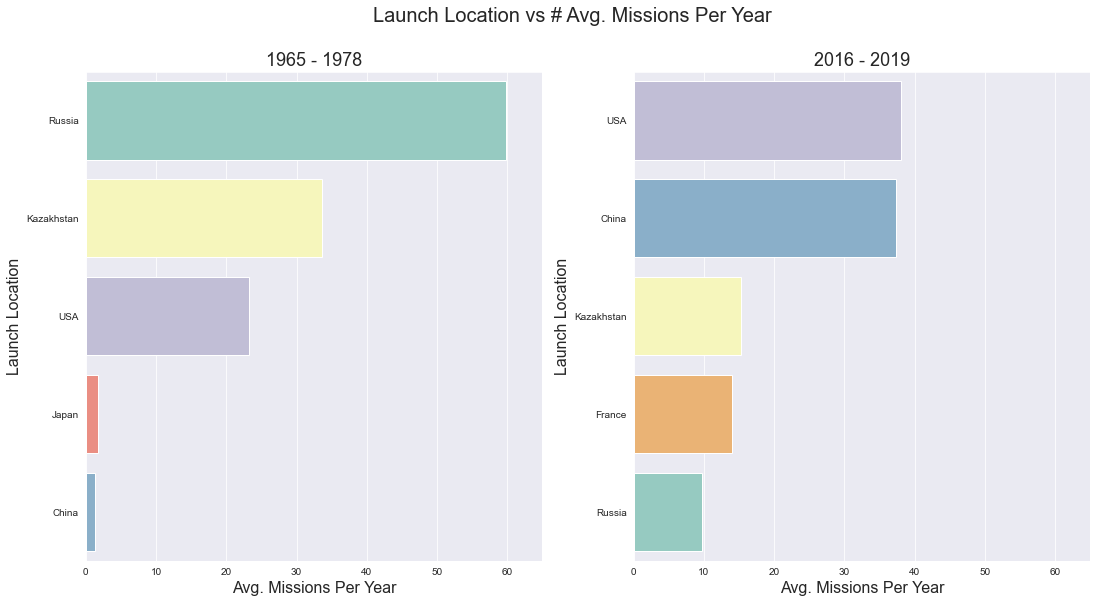

In [42]:
# scale, sort, and show only the top 5
avgPerYear65to78 = from65to78["Launch Location"].value_counts().mul(1 / 12).sort_values().nlargest(5).to_frame()
avgPerYear16to19 = from16to19["Launch Location"].value_counts().mul(1 / 3).sort_values().nlargest(5).to_frame()

# recreate frames with better column names (this will make plotting easier)
avgPerYear65to78 = pd.DataFrame({"Loc": avgPerYear65to78.index, "Avg": avgPerYear65to78["Launch Location"]})
avgPerYear16to19 = pd.DataFrame({"Loc": avgPerYear16to19.index, "Avg": avgPerYear16to19["Launch Location"]})

# configure multiple plots on the same figure (and its size), with a shared title
figure, axs = plt.subplots(ncols = 2, figsize = (18,9))
figure.suptitle("Launch Location vs # Avg. Missions Per Year",fontsize=20)

# plot the charts (with the same x-axis to avoid confusion)
# each with a custom palettes, a fist look at the data showed some countries feature in both periods, and we want to use the same colours in this case
axs[0] = sns.barplot(y="Loc", x="Avg", data=avgPerYear65to78, ax=axs[0], palette=color_brewer[:5])
axs[0].set_title("1965 - 1978", fontsize=18)
axs[0].set_xlabel("Avg. Missions Per Year",fontsize=16)
axs[0].set_ylabel("Launch Location", fontsize=16)
axs[0].set_xlim([0,65])

axs[1] = sns.barplot(y="Loc", x="Avg", data=avgPerYear16to19, ax=axs[1], palette=[color_brewer[2], color_brewer[4], color_brewer[1], color_brewer[5], color_brewer[0]])
axs[1].set_title("2016 - 2019", fontsize=18)
axs[1].set_xlabel("Avg. Missions Per Year",fontsize=16)
axs[1].set_ylabel("Launch Location", fontsize=16)
axs[1].set_xlim([0,65]) 

# show the plot
plt.show()

# save the fig
figure.savefig('../img/locationvsmissions.png')

### Year vs # Missions (with organisation information)

In [43]:
# first filter missions so that it only contains data for the top 12 most active organisations
top12organisations = missions['Organisation'].value_counts().sort_values().nlargest(12).to_frame().index.tolist()
missions_top_organisations = missions[missions['Organisation'].isin(top12organisations)]
missions_top_organisations

,Organisation,Detail,Status Rocket,Cost,Status Mission,Year,Launch Location
63,CASC,Long March 5 | Shijian-20,StatusActive,NaN,Success,2019,China
64,VKS RF,"Rokot/Briz KM | Gonets-M ???24, 25, 26 [block-...",StatusRetired,41.80,Success,2019,Russia
66,ULA,Atlas V N22 | Starliner OFT,StatusActive,NaN,Success,2019,USA
67,CASC,"Long March 4B | CBERS-4A, ETRSS-1 & Others",StatusActive,64.68,Success,2019,China
68,Arianespace,"Soyuz ST-A/Fregat-M | CSG-1, CHEOPS & Others",StatusActive,NaN,Success,2019,France
...,...,...,...,...,...,...,...
4307,US Air Force,Thor-DM 18 Able I | Pioneer 0,StatusRetired,NaN,Failure,1958,USA
4313,RVSN USSR,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,1958,Kazakhstan
4315,RVSN USSR,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,1958,Kazakhstan
4322,RVSN USSR,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957,Kazakhstan


In [59]:
yearly_missions_top_organisations = missions_top_organisations.groupby("Organisation")["Year"].value_counts().to_frame()
yearly_missions_top_organisations.rename(columns = {'Year':'Missions'}, inplace = True)
yearly_missions_top_organisations

Missions
Organisation Year          
Arianespace  2000        12
             2002        12
             2015        12
             1995        11
             1997        11
...                     ...
VKS RF       2009         3
             2010         3
             2015         3
             2011         1
             2012         1

[373 rows x 1 columns]

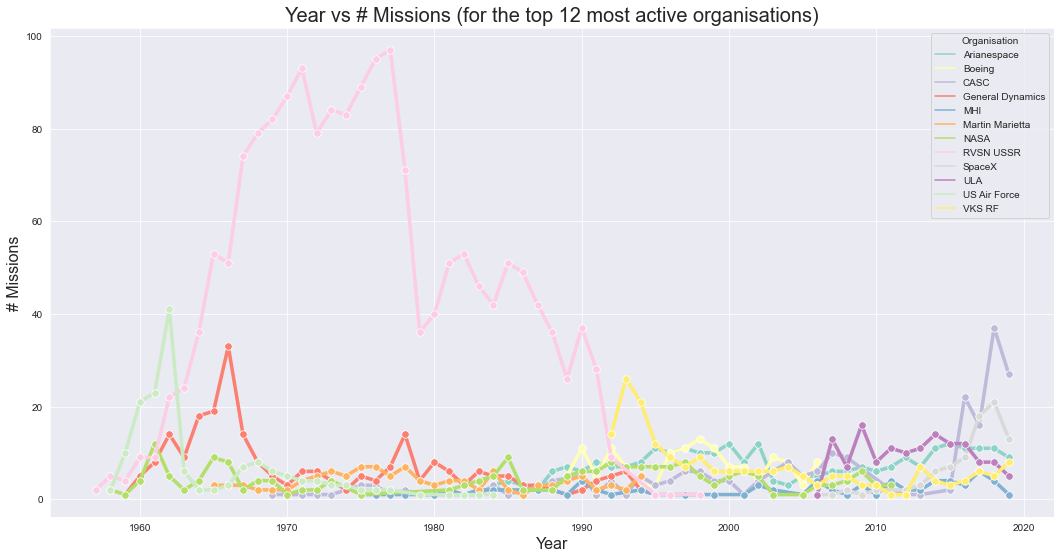

In [67]:
# set the plot size
fig = plt.figure(figsize=(18,9))

# plot the data (as a line chart)
ax = sns.lineplot(x="Year", y="Missions", hue="Organisation", data=yearly_missions_top_organisations, marker='o', linewidth=3.5, markersize=7.5)

# organize the axis
ax.axes.set_title("Year vs # Missions (for the top 12 most active organisations)",fontsize=20)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("# Missions", fontsize=16)

# show the plot
plt.show()

# save the fig
fig.savefig('../img/yearvsmissionswithorgsline.png')

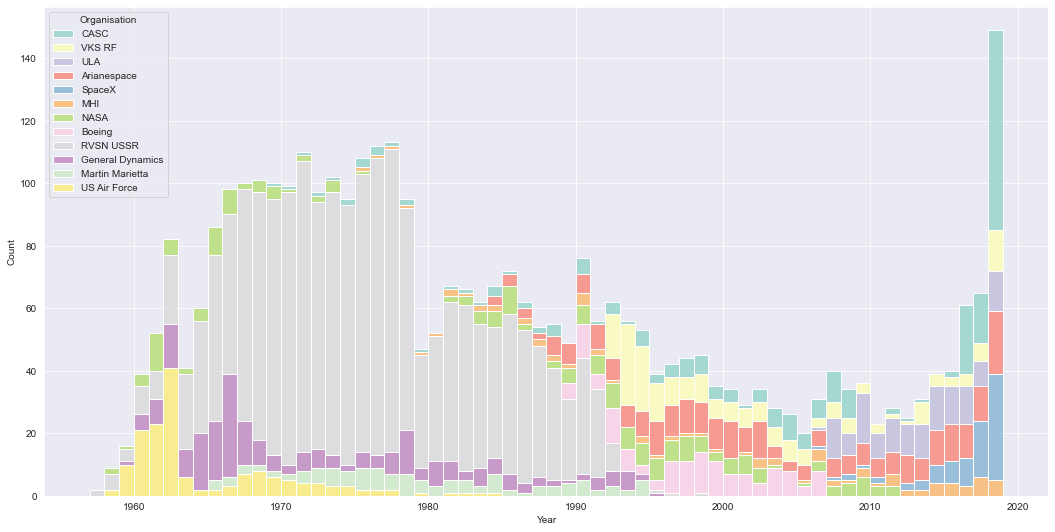

In [170]:
# set the plot size
fig = plt.figure(figsize=(18,9))

# plot the data (as a stacked bar chart)
sns.histplot(missions_top_organisations, x="Year", hue="Organisation", multiple="stack", bins=(2019-1957))

# organize the axis
ax.axes.set_title("Year vs # Missions (for the top 12 most active organisations)",fontsize=20)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("# Missions", fontsize=16)

# show the plot
plt.show()

# save the fig
fig.savefig('../img/yearvsmissionswithorgsstacked.png')

In [76]:
# set the plot size
fig = plt.figure(figsize=(18,9))

# plot the data (as a line chart)
ax = sns.barplot(x="Year", y="Missions", data=yearly_missions_top_organisations)

# organize the axis
ax.axes.set_title("Year vs # Missions (for the top 12 most active organisations)",fontsize=20)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylabel("# Missions", fontsize=16)

# show the plot
plt.show()

# save the fig
#fig.savefig('../img/yearvsmissionswithorgsline.png')

ValueError: Could not interpret input 'Year'

<Figure size 1296x648 with 0 Axes>